In [11]:
#modules and variables
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
fs = 13

# Molecular Dynamics Simulations
Molecular dynamics (MD) simulations were run on Li$_3$N using `TSTEP=20`. A supercell containing 500 atoms was used, and MD simualtions were run for 500ps to reduce noise and improve accuracy. Similar number of atoms and simulation times may be needed to achieve good results.

# Visualising Thermal Fluctuations

To minimise noise, we first want to know what temperature resolution to use for the heat capacity calculations - and later for the convolution. To make an informed guess, we can plot the standard deviation of mean temperatures to visualise thermal fluctuations. Then, we know that the temperature resolution should roughly equal the magnitude of the thermal fluctuations.

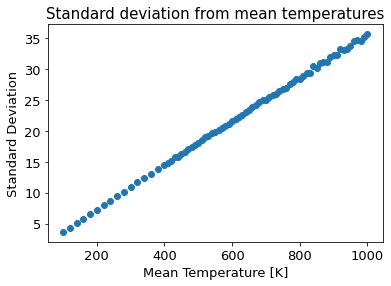

In [12]:
dev = np.loadtxt('tdev.txt')

mean = dev[0]
std = dev[1]

plt.title('Standard deviation from mean temperatures', fontsize=15)
plt.scatter(mean, std)
plt.xticks(fontsize=fs)
plt.xlabel('Mean Temperature [K]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('Standard Deviation', fontsize=fs)
plt.show()

From this example, we now know that a temperature resolution (`TSTEP`) of between 20-40K should be accurate and minimise noise at the same time. We can then run MD simulations over a temperature range of interest using that temperature resolution.

We ran MD simulations using `TSTEP=20`, so we can carry on and do not need to run simulations with a higher temperature resolution. We analyse the data using `TSTEP=20` and `TSTEP=40` to demonstrate the impact of `TSTEP` on accuracy and noise.

# Heat Capacity From Numerical Derivative 

Here the heat capacity, $C$, is evaluated by taking the numerical derivative of energy, $E$, with respect to temperature, $T$, $C=\frac{dE}{dT}$. Interestingly, we can see that `TSTEP=20` gives a very noisy plot, while `TSTEP=40` gives a plot with a much clearer trend, hence highlighting the phase transition. 

### `TSTEP=20`

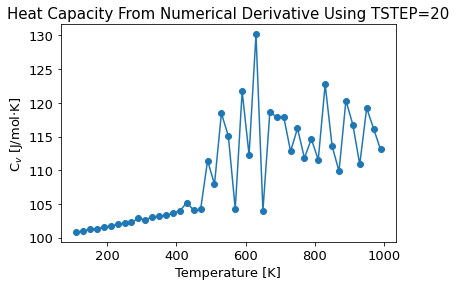

In [57]:
data20_nd = np.loadtxt('20Ksteps_c_numder.txt')

plt.scatter(data20_nd[0], data20_nd[1])
plt.plot(data20_nd[0], data20_nd[1])
plt.title('Heat Capacity From Numerical Derivative Using TSTEP=20', fontsize=15)
plt.xticks(fontsize=fs)
plt.xlabel('Temperature [K]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('C$_v$ [J/mol$\cdot$K]', fontsize=fs)
plt.show()

### `TSTEP=40`

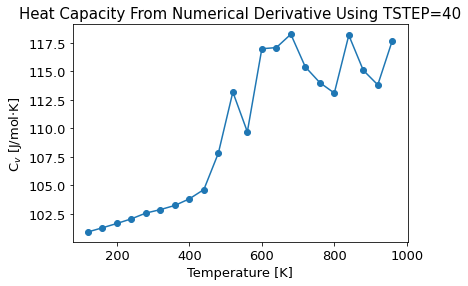

In [56]:
data40_nd = np.loadtxt('40Ksteps_c_numder.txt')

plt.scatter(data40_nd[0], data40_nd[1])
plt.plot(data40_nd[0], data40_nd[1])
plt.title('Heat Capacity From Numerical Derivative Using TSTEP=40', fontsize=15)
plt.xticks(fontsize=fs)
plt.xlabel('Temperature [K]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('C$_v$ [J/mol$\cdot$K]', fontsize=fs)
plt.show()

# Heat Capacity From Statistical Mechanics
Here the heat capacity is evaluated from the equation, $C_v=\frac{(<E^2>-<E>^2)}{k_BT^2}$. Interestingly, we can see that this method gives a less noisy plot when using `TSTEP=20`. In fact, `TSTEP=40` seem to miss some important features and give misleading results. It shows the first peak also observed with `TSTEP=20`, which seems to be due to noise when looking at the `TSTEP=20` plot, and not the second peak, which seems to be the real peak when looking at the `TSTEP=20` plot. 

Overall this method seems to be less sensitive to noise when increasing the temperature resolution 

### `TSTEP=20`

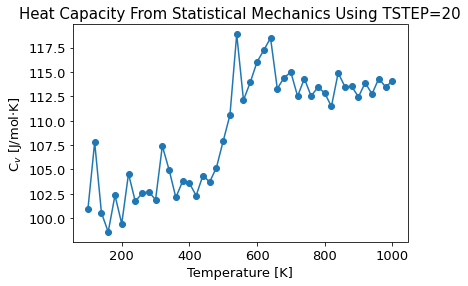

In [58]:
data20_sm = np.loadtxt('20Ksteps_c_mssm.txt')

plt.scatter(data20_sm[0], data20_sm[1])
plt.plot(data20_sm[0], data20_sm[1])
plt.title('Heat Capacity From Statistical Mechanics Using TSTEP=20', fontsize=15)
plt.xticks(fontsize=fs)
plt.xlabel('Temperature [K]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('C$_v$ [J/mol$\cdot$K]', fontsize=fs)
plt.show()

### `TSTEP=40`

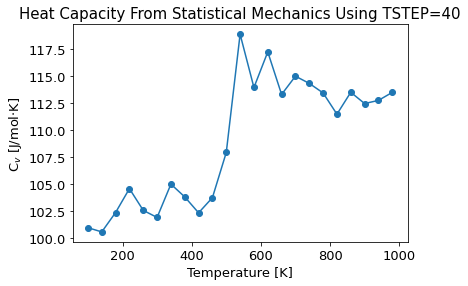

In [59]:
data40_sm = np.loadtxt('40Ksteps_c_mssm.txt')

plt.scatter(data40_sm[0], data40_sm[1])
plt.plot(data40_sm[0], data40_sm[1])
plt.title('Heat Capacity From Statistical Mechanics Using TSTEP=40', fontsize=15)
plt.xticks(fontsize=fs)
plt.xlabel('Temperature [K]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('C$_v$ [J/mol$\cdot$K]', fontsize=fs)
plt.show()

# Comparison Between The Two Methods
We can see that both methods compare well, which is a good sanity check for the data. It can also help us pick apart meaningful data from noise.

### `TSTEP=20`

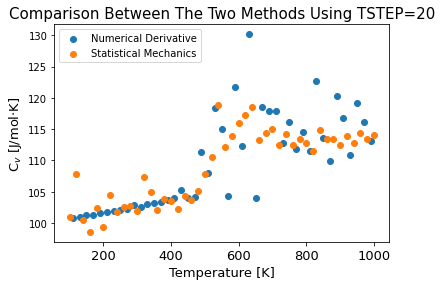

In [60]:
plt.scatter(data20_nd[0], data20_nd[1], label='Numerical Derivative')
plt.scatter(data20_sm[0], data20_sm[1], label='Statistical Mechanics')
plt.title('Comparison Between The Two Methods Using TSTEP=20', fontsize=15)
plt.xticks(fontsize=fs)
plt.ylabel('C$_v$ [J/mol$\cdot$K]', fontsize=fs)
plt.xlabel('Temperature [K]', fontsize=fs)
plt.legend()
plt.show()

### `TSTEP=40`

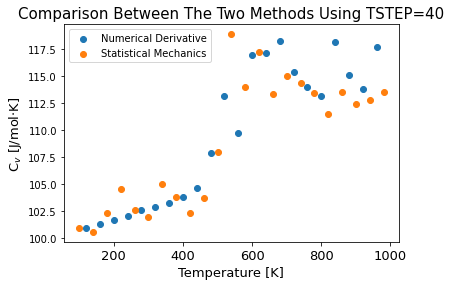

In [62]:
plt.scatter(data40_nd[0], data40_nd[1], label='Numerical Derivative')
plt.scatter(data40_sm[0], data40_sm[1], label='Statistical Mechanics')
plt.title('Comparison Between The Two Methods Using TSTEP=40', fontsize=15)
plt.xticks(fontsize=fs)
plt.ylabel('C$_v$ [J/mol$\cdot$K]', fontsize=fs)
plt.xlabel('Temperature [K]', fontsize=fs)
plt.legend()
plt.show()

# Convolution With A Gaussian

To reduce the noise observed in the heat capacity plots we can compute the convolution of the heat capacity with a Gaussian to obtain a third function, the convoluted heat capacity. Essentially, for each heat capacity point, we take into account surrounding data points with varying intensity using a Gaussian. The convolution adjusts the heat capacity point and overall creates a smoother function.

Now, let us say that regardless of `TSTEP` we choose to take into account surrouding data points in the +/- 40K temperature range because of thermal fluctuations. This means that, given our `TSTEP`, we have to choose a specifc number of points for our Gaussian.

### `TSTEP=20`
Here, we can see that we need to set `points=7` to include +/- 40K data points in the convolution (non-zero intensity in the Gaussian).

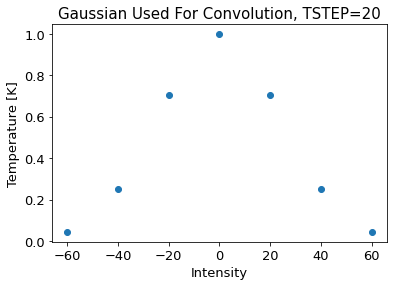

In [63]:
TSTEP = 20
points=7
xx = np.linspace(-1, 1, points)
kernel20 = norm.pdf(xx, loc=0, scale=0.4)
tt = xx*((points-1)/2)*TSTEP

plt.scatter(tt, kernel20)
plt.title('Gaussian Used For Convolution, TSTEP=20', fontsize=15)
plt.xlabel('Intensity', fontsize=fs)
plt.xticks(fontsize=fs)
plt.ylabel('Temperature [K]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.show()

### `TSTEP=40`
Here, we can see that we need to set `points=5` to include +/- 40K data in the convolution (non-zero intensity in the Gaussian).

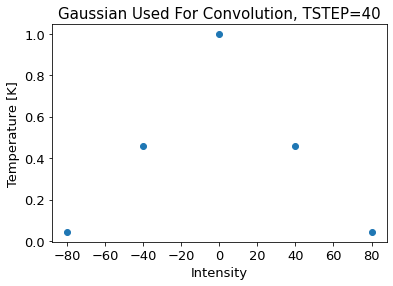

In [64]:
TSTEP = 40
points=5
xx = np.linspace(-1, 1, points)
kernel40 = norm.pdf(xx, loc=0, scale=0.4)
tt = xx*((points-1)/2)*TSTEP

plt.scatter(tt, kernel40)
plt.title('Gaussian Used For Convolution, TSTEP=40', fontsize=15)
plt.xlabel('Intensity', fontsize=fs)
plt.xticks(fontsize=fs)
plt.ylabel('Temperature [K]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.show()

# Convoluted Heat Capacity
Now that we have defined our Gaussian we calculated the convolution of the two functions. The heat capacity, however, has non-zero boundary values. This will generate boundary effects, or discontinuities at the edge of the convoluted function. We therefore have to define boundary values.

It is good news to see that, regardless of the method, or temperature resolution the convoluted heat capacity follow similar shapes and show peaks at similar temperatures and with the same maximum value - expect from the statistical mechanics result using `TSTEP=40`, which seems to have missed important data points.

First, let us try plotting the convoluted heat capacity without setting boundary values to illustrate this point.

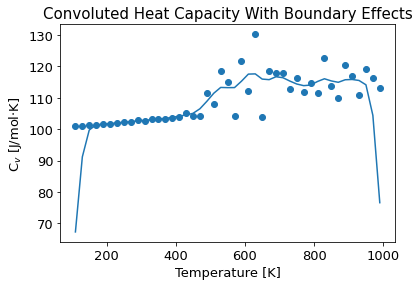

In [65]:
C = np.convolve(data20_nd[1], kernel20, mode='same')/np.sum(kernel20)

plt.scatter(data20_nd[0], data20_nd[1])
plt.plot(data20_nd[0], C)
plt.title('Convoluted Heat Capacity With Boundary Effects', fontsize=15)
plt.xticks(fontsize=fs)
plt.xlabel('Temperature [K]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('C$_v$ [J/mol$\cdot$K]', fontsize=fs)
plt.show()

### Numerical Derivative, `TSTEP=20`

Data taken within [170.0:950.0]


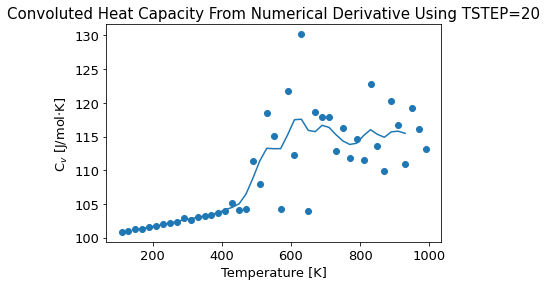

In [66]:
#boundary values
low_b = 3
up_b = 42

#convolution
C = np.convolve(data20_nd[1], kernel20, mode='same')/np.sum(kernel20)

#removing zones with boundary effects
C = C[low_b:up_b]
t = data20_nd[0][low_b:up_b]
print('Data taken within ['+str(np.floor(data20_nd[0][low_b]))+':'+str(np.floor(data20_nd[0][up_b]))+']')

plt.scatter(data20_nd[0], data20_nd[1])
plt.plot(t, C)
plt.title('Convoluted Heat Capacity From Numerical Derivative Using TSTEP=20', fontsize=15)
plt.xticks(fontsize=fs)
plt.xlabel('Temperature [K]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('C$_v$ [J/mol$\cdot$K]', fontsize=fs)
plt.show()

### Numerical Derivative, `TSTEP=40`

Data taken within [200.0:920.0]


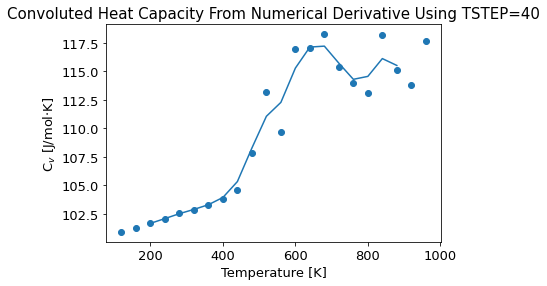

In [67]:
#boundary values
low_b = 2
up_b = 20

#convolution
C = np.convolve(data40_nd[1], kernel40, mode='same')/np.sum(kernel40)

#removing zones with boundary effects
C = C[low_b:up_b]
t = data40_nd[0][low_b:up_b]
print('Data taken within ['+str(np.floor(data40_nd[0][low_b]))+':'+str(np.floor(data40_nd[0][up_b]))+']')

plt.scatter(data40_nd[0], data40_nd[1])
plt.plot(t, C)
plt.title('Convoluted Heat Capacity From Numerical Derivative Using TSTEP=40', fontsize=15)
plt.xticks(fontsize=fs)
plt.xlabel('Temperature [K]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('C$_v$ [J/mol$\cdot$K]', fontsize=fs)
plt.show()

### Satistical Mechanics, `TSTEP=20`

Data taken within [139.0:960.0]


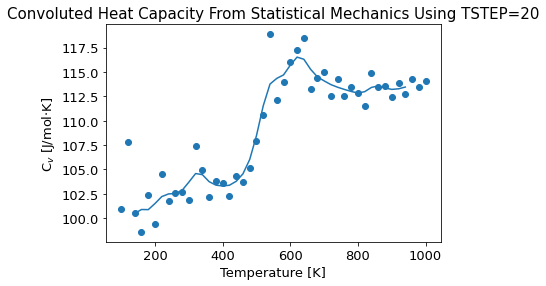

In [68]:
#boundary values
low_b = 2
up_b = 43

#convolution
C = np.convolve(data20_sm[1], kernel20, mode='same')/np.sum(kernel20)

#removing zones with boundary effects
C = C[low_b:up_b]
t = data20_sm[0][low_b:up_b]
print('Data taken within ['+str(np.floor(data20_sm[0][low_b]))+':'+str(np.floor(data20_sm[0][up_b]))+']')

plt.scatter(data20_sm[0], data20_sm[1])
plt.plot(t, C)
plt.title('Convoluted Heat Capacity From Statistical Mechanics Using TSTEP=20', fontsize=15)
plt.xticks(fontsize=fs)
plt.xlabel('Temperature [K]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('C$_v$ [J/mol$\cdot$K]', fontsize=fs)
plt.show()

### Satistical Mechanics, `TSTEP=40`

Data taken within [180.0:940.0]


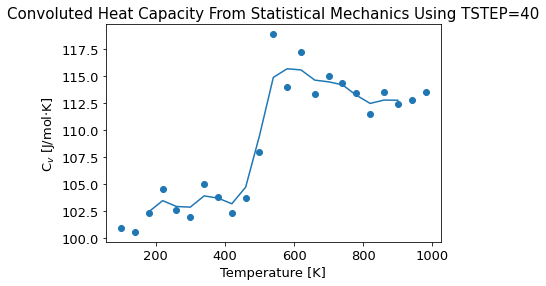

In [69]:
#boundary values
low_b = 2
up_b = 21

#convolution
C = np.convolve(data40_sm[1], kernel40, mode='same')/np.sum(kernel40)

#removing zones with boundary effects
C = C[low_b:up_b]
t = data40_sm[0][low_b:up_b]
print('Data taken within ['+str(np.floor(data40_sm[0][low_b]))+':'+str(np.floor(data40_sm[0][up_b]))+']')

plt.scatter(data40_sm[0], data40_sm[1])
plt.plot(t, C)
plt.title('Convoluted Heat Capacity From Statistical Mechanics Using TSTEP=40', fontsize=15)
plt.xticks(fontsize=fs)
plt.xlabel('Temperature [K]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('C$_v$ [J/mol$\cdot$K]', fontsize=fs)
plt.show()